Frederick Levins
MU CSE432, Machine Learning

This is the jupyter notebook for machine learning final project. The notebook contains data extraction and various modeling techniques with different hyper parameters and cross validation.



In [ ]:
# Initial imports
from google.colab import drive
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.pyplot as plt


In [ ]:
# Connect to google drive and location of project
# Ensure all aspects within
from google.colab import drive
drive.mount('/content/drive')
notebookPath = '/content/drive/MyDrive/ML/FinalPrj/CSE432FinalProject.ipynb'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read in the dataset from the folder, format is same with csv so *
fileIn = glob.glob('/content/drive/MyDrive/ML/FinalPrj/DataSet1/DataSet1/**/*.csv')
print(len(fileIn))

# Create df from read in files
df = pd.DataFrame.from_dict(fileIn)

# Print the head
df.head()

# parse over string adn rename to path
df.rename(columns={0: 'path'}, inplace=True)
df.head()

520


,path
0,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...
1,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...
2,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...
3,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...
4,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...


In [ ]:
# Apply files to date frames
df['file'] = df['path'].apply(os.path.basename)


# Split dataframes of experiment ID with delimters: '-','new',and'C'
df['expID'] = df['file'].apply(lambda x: x.split('_')[0].split('new')[0].split('C')[0]) #new
df.head()

,path,file,expID
0,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,122_MetaWear_2019-11-18T17.11.00.902_F1E55E2FE...,122
1,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,122_MetaWear_2019-11-18T17.11.00.902_F1E55E2FE...,122
2,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,122_MetaWear_2019-11-18T17.11.00.902_F1E55E2FE...,122
3,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,125_MetaWear_2019-11-18T17.32.38.645_F1E55E2FE...,125
4,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,125_MetaWear_2019-11-18T17.32.38.645_F1E55E2FE...,125


Data Cleaning

In [ ]:
# Extract sensor and frequency information
df[['sensor', 'frequency']] = df['file'].str.split('_', expand=True).iloc[:, [4, 5]]

# Remove rows with invalid expID values and convert to int32
df['expID'] = pd.to_numeric(df['expID'], errors='coerce')
df = df.dropna(subset=['expID']).astype({'expID': 'int32'})

# Keep only expIDs that appear reoccurently with exactly 4 sensors
df = df[df['expID'].isin(df['expID'].value_counts()[df['expID'].value_counts() == 4].index)]

# Confirm changes occured
print(f"Number of invalid expIDs: {df['expID'].isnull().sum()}")
df['expID'].value_counts()


Number of invalid expIDs: 0


,count
expID,
122,4
42,4
58,4
55,4
24,4
...,...
73,4
72,4
68,4


Labeling

In [ ]:
# 1: "Reading a book",
# 2: "Writing on a notebook",
# 3: "Typing",
# 4: "Browsing",
# 5: "Moving head, body",
# 6: "Moving chair",
# 7: "Stand up from sitting",
# 8: "Standing",
# 9: "Walking",
# 10: "Running",
# 11: "Taking the stairs"

# Define a dict to correlate above activites to experimment IDs
expDic = {
    1: "Sitting and Reading a book",
    2: "Writing on a notebook",
    3: "Typing",
    4: "Browsing",
    5: "Moving head, body",
    6: "Moving chair",
    7: "Stand up from sitting",
    8: "Standing",
    9: "Walking",
    10: "Running",
    11: "Taking the stairs"
}

In [ ]:
# Uniquely identify each experiment ID to correlated user from datasheet
# Each range is prespecified
def userId(expID):
    userRanges = {
        "user 1": [(1, 7), (43, 46)],
        "user 2": [(8, 14), (47, 50)],
        "user 3": [(15, 21), (51, 54)],
        "user 4": [(22, 28), (55, 58)],
        "user 5": [(29, 35), (59, 62)],
        "user 6": [(36, 42), (63, 66)],
        "user 7": [(67, 77)],
        "user 8": [(79, 88)],
        "user 9": [(89, 99)],
        "user 10": [(100, 110)],
        "user 11": [(111, 121)],
        "user 12": [(122, 132)]
    }

    # Correlate each loop based on ranges
    for user, ranges in userRanges.items():
        for start, end in ranges:
            if start <= expID <= end:
                return user
    # Return None if no experiment ID in range
    return None

# Apply to df
df['userID'] = df['expID'].apply(userId)
df.head()


,path,file,expID,sensor,frequency,userID
0,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,122_MetaWear_2019-11-18T17.11.00.902_F1E55E2FE...,122,Magnetometer,20.000Hz,user 12
1,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,122_MetaWear_2019-11-18T17.11.00.902_F1E55E2FE...,122,Gyroscope,100.000Hz,user 12
2,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,122_MetaWear_2019-11-18T17.11.00.902_F1E55E2FE...,122,Accelerometer,100.000Hz,user 12
3,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,125_MetaWear_2019-11-18T17.32.38.645_F1E55E2FE...,125,Accelerometer,100.000Hz,user 12
4,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,125_MetaWear_2019-11-18T17.32.38.645_F1E55E2FE...,125,Pressure,7.330Hz,user 12


In [ ]:
# Set userId to correlate to experiment number
def expNo(expId):
  return ((expId - 118) % 11) +1

# Set userId to correlate to experiment name (activity in sheet)
def expName(expNo):
  return expDic[expNo]

# Apply to df
df['expNo'] = df['expID'].apply(expNo)
df['expName'] = df['expNo'].apply(expName)
df.head()

,path,file,expID,sensor,frequency,userID,expNo,expName
0,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,122_MetaWear_2019-11-18T17.11.00.902_F1E55E2FE...,122,Magnetometer,20.000Hz,user 12,5,"Moving head, body"
1,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,122_MetaWear_2019-11-18T17.11.00.902_F1E55E2FE...,122,Gyroscope,100.000Hz,user 12,5,"Moving head, body"
2,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,122_MetaWear_2019-11-18T17.11.00.902_F1E55E2FE...,122,Accelerometer,100.000Hz,user 12,5,"Moving head, body"
3,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,125_MetaWear_2019-11-18T17.32.38.645_F1E55E2FE...,125,Accelerometer,100.000Hz,user 12,8,Standing
4,/content/drive/MyDrive/ML/FinalPrj/DataSet1/Da...,125_MetaWear_2019-11-18T17.32.38.645_F1E55E2FE...,125,Pressure,7.330Hz,user 12,8,Standing


In [ ]:
# Combines data for a specific activity and sensor type from multiple files into a one df
def allAct(expNo, sensorType):

 # Filter the main DataFrame for the given experiment and sensor type
  filterDF = df[(df['expNo'] == expNo) & (df['sensor'] == sensorType)]

  # Read and concatenate all data from all
  allDF = pd.concat([pd.read_csv(file_path).assign(expNo=expNo, sensor=sensorType, userID=filterDF.loc[filterDF['path'] == file_path, 'userID'].iloc[0])

  # main loop to create list based on filtered path
  for file_path in filterDF['path']], ignore_index=True)

  # DataFrame containing the combined data for the specified activity and sensor
  return allDF

In [ ]:
# This function iterates through all sensors and experiment numbers, seeing correlations, then returns list of dfs
def allFill(sensors):
  allFillDone = []
  for sensor in sensors:
    for expNo in df['expNo'].unique():
      act = allAct(expNo, sensor)
      allFillDone.append(act)
  return allFillDone

# Fill with current data
allFill = allFill(df['sensor'].unique())

# Confirm fill
print(allFill[0].shape)
allFill[8].head(100)

(27010, 9)


,epoch (ms),time (-13:00),elapsed (s),x-axis (T),y-axis (T),z-axis (T),expNo,sensor,userID
0,1574117630687,2019-11-18T17:53:50.687,0.00,0.000025,0.000037,-0.000025,2,Magnetometer,user 12
1,1574117630737,2019-11-18T17:53:50.737,0.05,0.000024,0.000036,-0.000026,2,Magnetometer,user 12
2,1574117630787,2019-11-18T17:53:50.787,0.10,0.000026,0.000037,-0.000027,2,Magnetometer,user 12
3,1574117630837,2019-11-18T17:53:50.837,0.15,0.000025,0.000037,-0.000025,2,Magnetometer,user 12
4,1574117630887,2019-11-18T17:53:50.887,0.20,0.000025,0.000037,-0.000028,2,Magnetometer,user 12
...,...,...,...,...,...,...,...,...,...
95,1574117635437,2019-11-18T17:53:55.437,4.75,0.000036,0.000037,-0.000037,2,Magnetometer,user 12
96,1574117635487,2019-11-18T17:53:55.487,4.80,0.000037,0.000036,-0.000037,2,Magnetometer,user 12
97,1574117635537,2019-11-18T17:53:55.537,4.85,0.000037,0.000036,-0.000037,2,Magnetometer,user 12
98,1574117635587,2019-11-18T17:53:55.587,4.90,0.000037,0.000036,-0.000036,2,Magnetometer,user 12


In [ ]:
from sklearn.preprocessing import LabelEncoder
import warnings
import random
import seaborn as sns

EDA

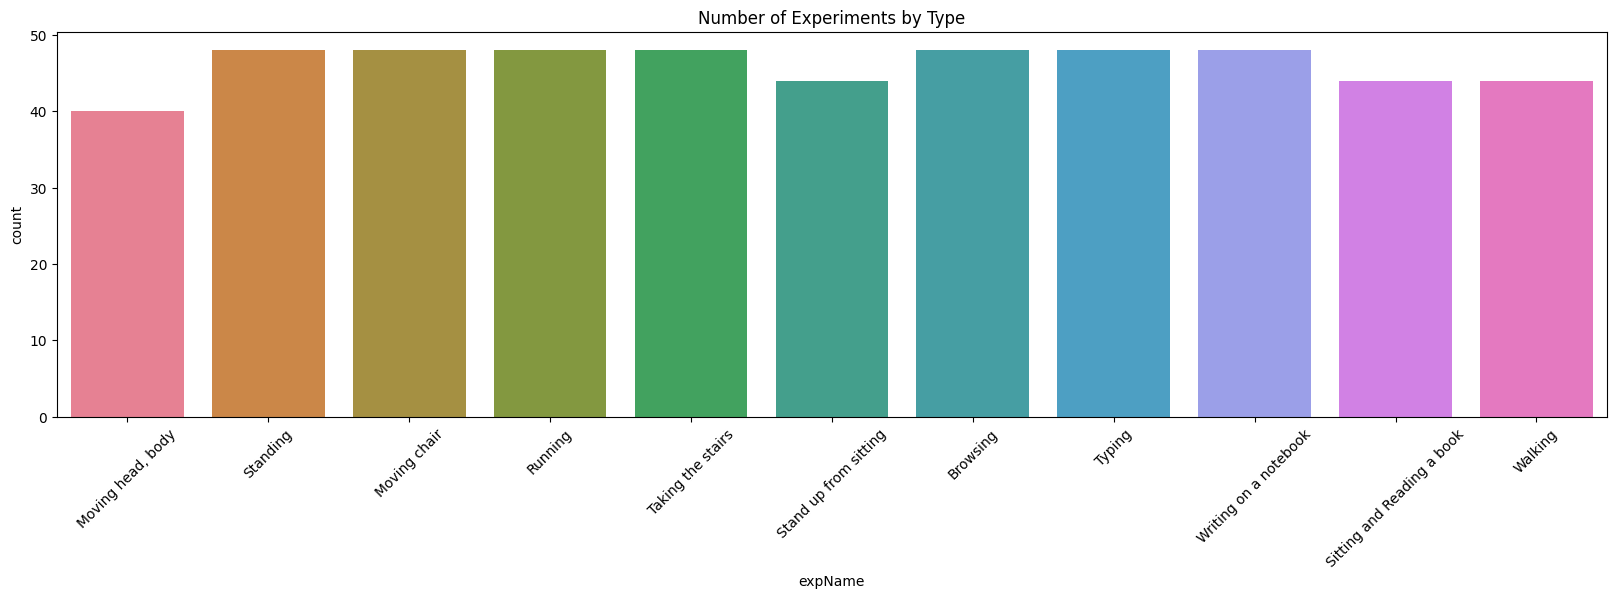

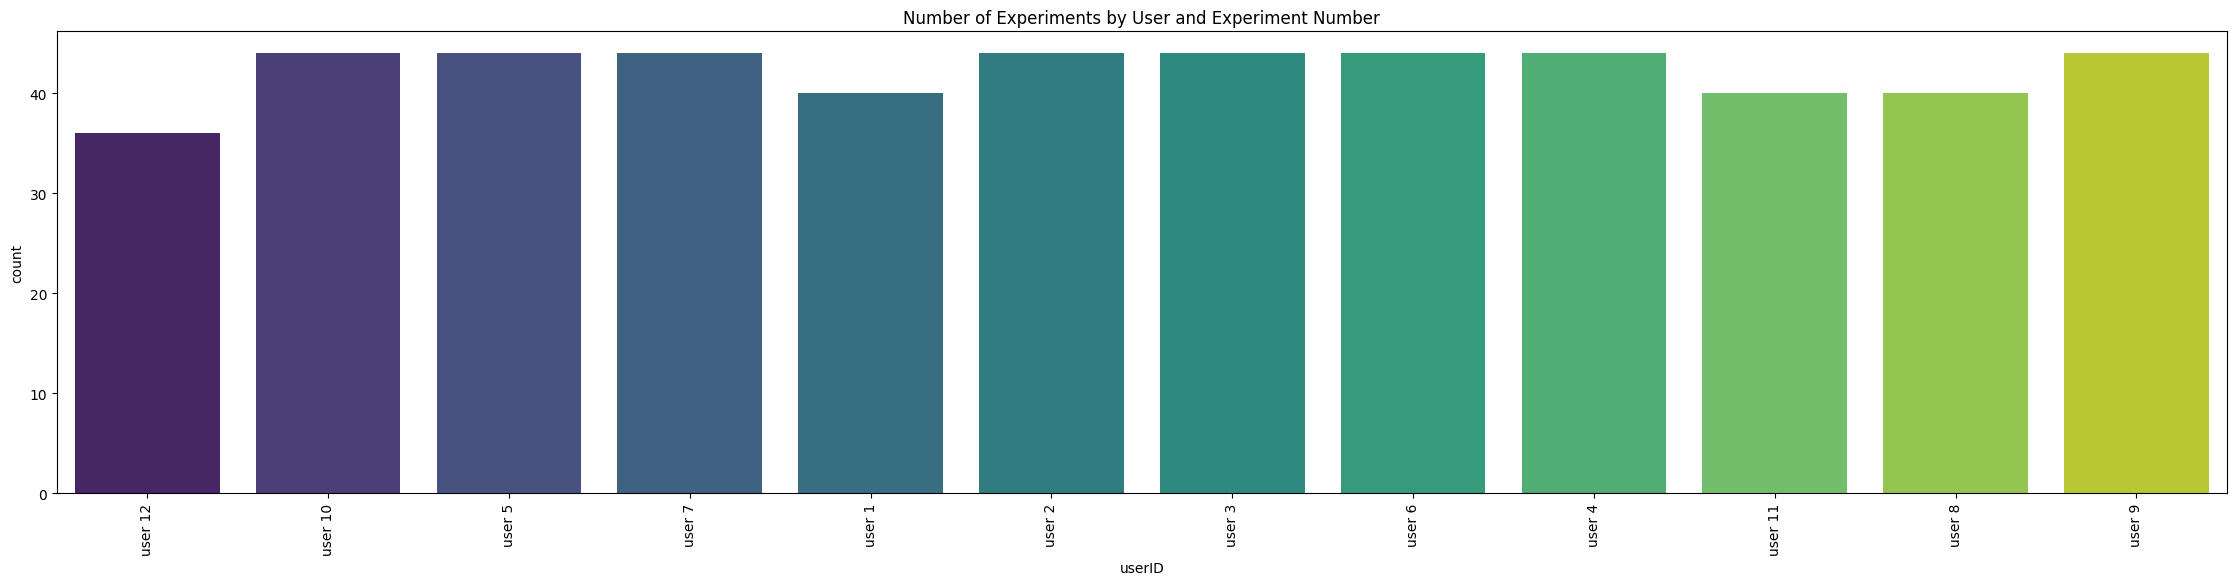

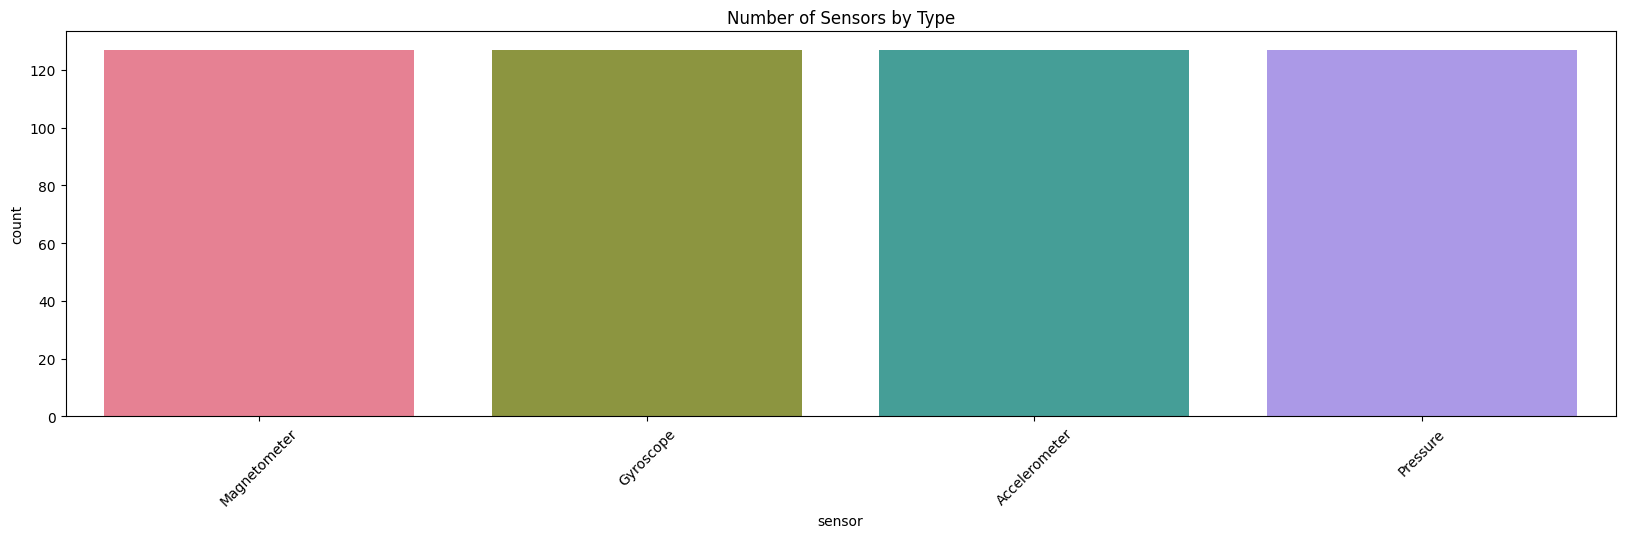

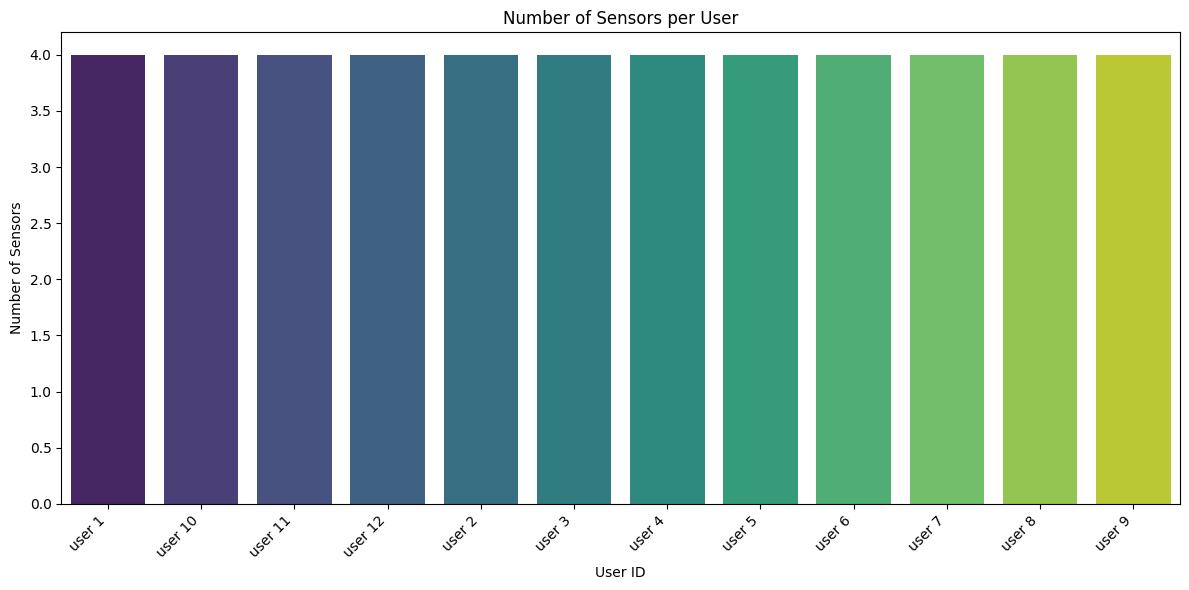

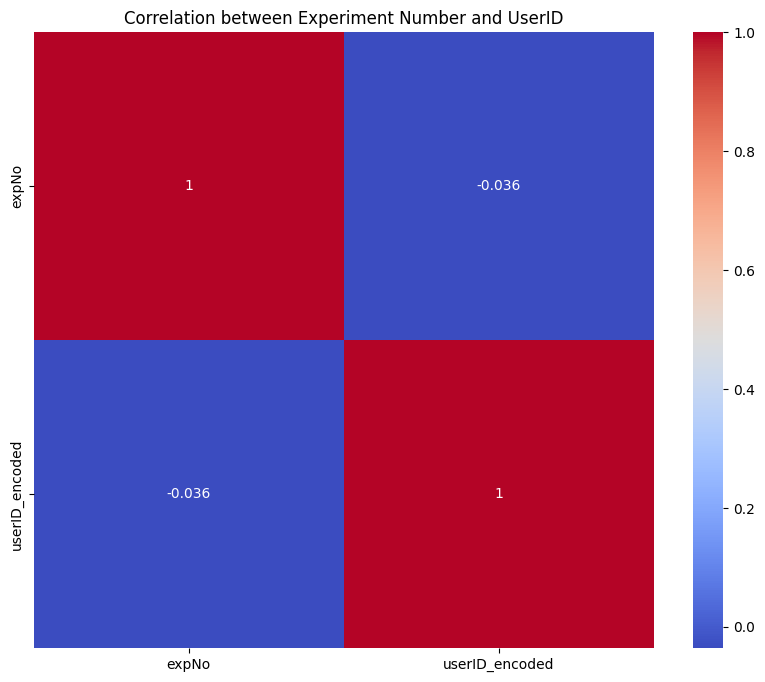

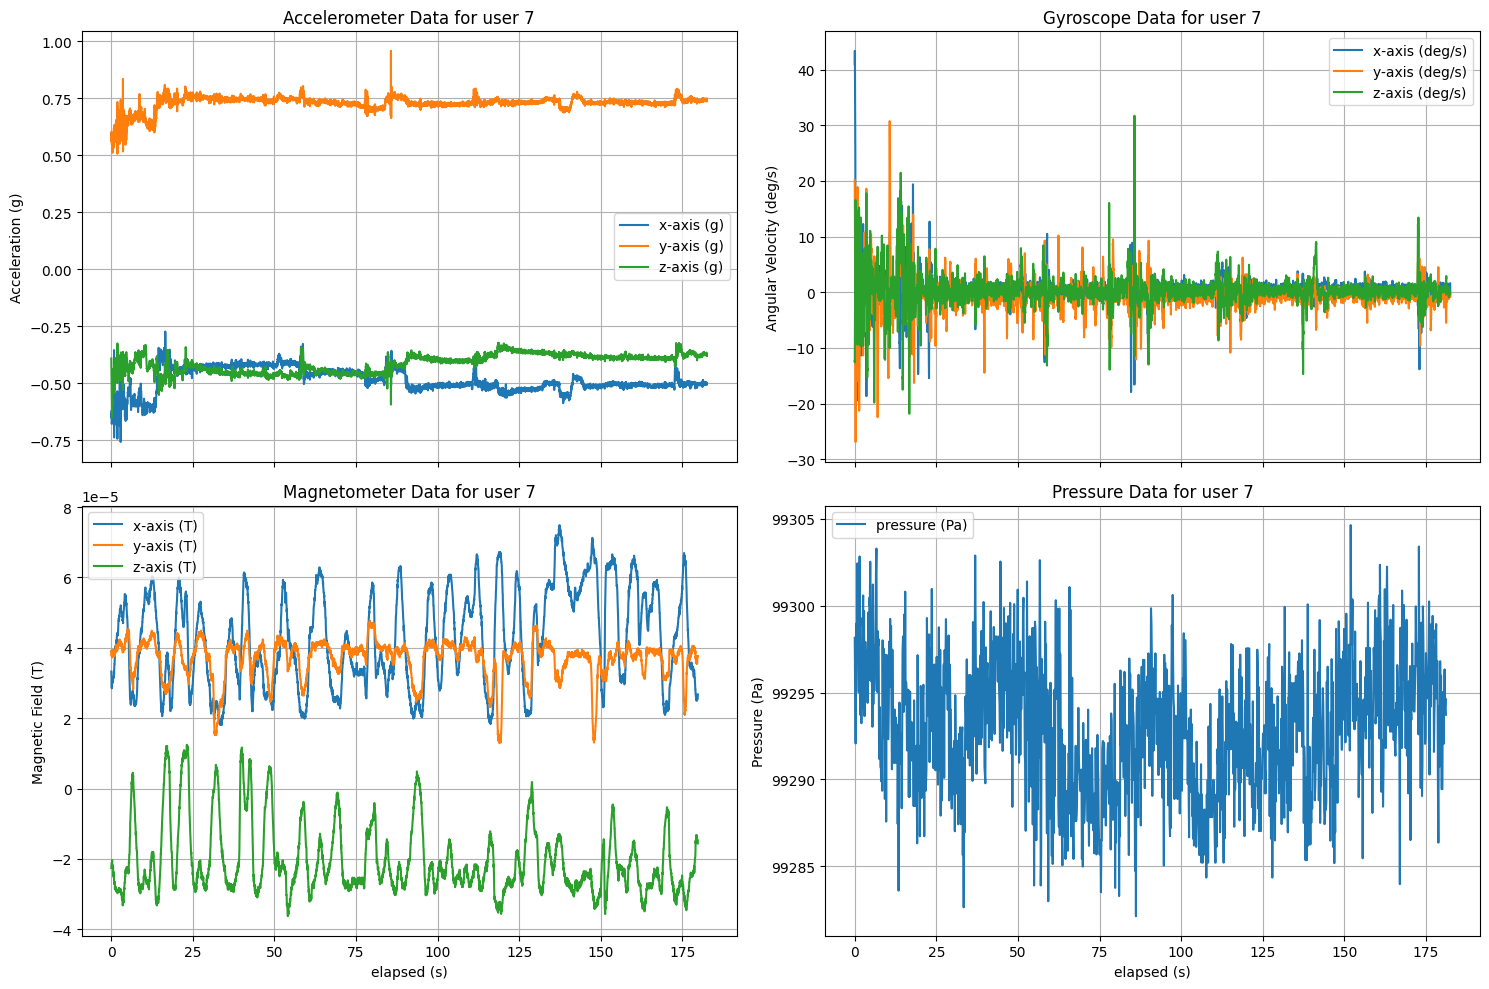

In [ ]:
# Graph 1: Total number of experiments for each experiment type (expName)
plt.figure(figsize = (20, 5))

# Get the number of unique experiment names
numExpNames = len(df['expName'].unique())

# Creates a color palette with the desired number of colors
colors = sns.color_palette('husl', numExpNames)

# Create the countplot with the custom palette for viewing better
sns.countplot(x='expName', data=df, palette=colors)
plt.title("Number of Experiments by Type")

# Help fix long names on x-axis
plt.xticks(rotation=45)
plt.show()

# Graph 2: Number of experiments by user compared to experience number (userID vs expNo)
plt.figure(figsize = (28, 6))

# Get the number of unique user IDs
numUserIds = len(df['userID'].unique())

# Creates a color palette with the desired number of colors with sequential for change
colors = sns.color_palette('viridis', numUserIds)

# Create the countplot with the custom palette
sns.countplot(x='userID', data=df, palette=colors)
plt.title('Number of Experiments by User and Experiment Number')
plt.xticks(rotation=90)
plt.show()

# Graph 3: Number of experiments per user (without splitting by expNo)
plt.figure(figsize = (20, 5))

# Get the number of unique experiment names
numSensorNames = len(df['sensor'].unique())

# Create a color palette with the desired number of colors using perceptually uniform colors
colors = sns.color_palette('husl', numSensorNames)

# Create the countplot with the custom palette
sns.countplot(x='sensor', data=df, palette=colors)
plt.title("Number of Sensors by Type")
plt.xticks(rotation=45)  # Rotate labels if experiment names are long
plt.show()

# graph 4:  Group data by user and count sensors, reset index to solve off count error
sensorCounts= df.groupby('userID')['sensor'].nunique().reset_index()

# Create bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='userID', y='sensor', data=sensorCounts, palette='viridis')
plt.title('Number of Sensors per User')
plt.xlabel('User ID')
plt.ylabel('Number of Sensors')

# Improve readability and layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Graph 5: Heatmap of the correlation between experiment numbers and users
# Create a LabelEncoder object
encoder = LabelEncoder()

# Fit the encoder to the unique values of the userID
encoder.fit(df['userID'])

# Transform userID column to numeric values for usage, error otherwise
df['userID_encoded'] = encoder.transform(df['userID'])

# Calculate correlation
corrMat = df[['expNo', 'userID_encoded']].corr()

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(corrMat, annot=True, cmap='coolwarm')
plt.title('Correlation between Experiment Number and UserID')
plt.show()

# Graph 5: Unique Sensor data
# Function to parse through data and plot data of all sensors for a random user
def plotSensDataRand(df):

    # Choose a random user
    randUser = random.choice(df['userID'].unique())

    # Filter data for the selected user
    userData = df[df['userID'] ==  randUser]

    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

    # Ease iteration
    axes = axes.flatten()

    # Sensor data lists and column access points
    sensor_configs = [
        {'sensor': 'Accelerometer', 'columns': ['x-axis (g)', 'y-axis (g)', 'z-axis (g)'], 'ylabel': 'Acceleration (g)'},
        {'sensor': 'Gyroscope', 'columns': ['x-axis (deg/s)', 'y-axis (deg/s)', 'z-axis (deg/s)'], 'ylabel': 'Angular Velocity (deg/s)'},
        {'sensor': 'Magnetometer', 'columns': ['x-axis (T)', 'y-axis (T)', 'z-axis (T)'], 'ylabel': 'Magnetic Field (T)'},
        {'sensor': 'Pressure', 'columns': ['pressure (Pa)'], 'ylabel': 'Pressure (Pa)'}
    ]

    # Iterate and plot for each sensor
    for i, config in enumerate(sensor_configs):
        ax = axes[i]
        sensor_data = userData[userData['sensor'] == config['sensor']]

        # Get the file path for the sensor data
        filePath = sensor_data['path'].iloc[0]
        sensorDF = pd.read_csv(filePath)

        for column in config['columns']:
            sns.lineplot(x='elapsed (s)', y=column, data=sensorDF, ax=ax, label=column)

        ax.set_title(f"{config['sensor']} Data for { randUser}")
        ax.set_ylabel(config['ylabel'])
        ax.legend()
        ax.grid(True)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
plotSensDataRand(df)



Windowing

In [ ]:

# Helper function to create feature files
def generateFeatFile(df, windSize, overlap, fileName):
    resultList = []

    stepSize = int(windSize * (1 - overlap))  # Calculate step size based on overlap

    for expID in df['expID'].value_counts().index:
        tempDF = df[df['expID'] == expID]

        # Load Accelerometer data
        accFilePath = tempDF.loc[tempDF['sensor'] == "Accelerometer", 'path'].iloc[0]
        accDF = pd.read_csv(accFilePath)
        accDF.rename(columns={'x-axis (g)': 'x', 'y-axis (g)': 'y', 'z-axis (g)': 'z'}, inplace=True)
        accDF = accDF[['x', 'y', 'z']]

        # Load Gyroscope data
        gyroFilePath = tempDF.loc[tempDF['sensor'] == "Gyroscope", 'path'].iloc[0]
        gyroDF = pd.read_csv(gyroFilePath)
        gyroDF.rename(columns={'x-axis (deg/s)': 'x', 'y-axis (deg/s)': 'y', 'z-axis (deg/s)': 'z'}, inplace=True)
        gyroDF = gyroDF[['x', 'y', 'z']]

        # Generate features for each window
        for i in range(0, len(accDF) - windSize + 1, stepSize):
            windAccData = accDF.iloc[i:i+windSize]
            windGyroData = gyroDF.iloc[i:i+windSize]

            # Accelerometer features
            accFeatures = {
                'acc_x_var': windAccData['x'].var(),
                'acc_y_var': windAccData['y'].var(),
                'acc_z_var': windAccData['z'].var(),
                'acc_sumxyz': windAccData.sum().sum(),
                'acc_sum_mean': windAccData.sum().mean(),
                'acc_x_mean': windAccData['x'].mean(),
                'acc_y_mean': windAccData['y'].mean(),
                'acc_z_mean': windAccData['z'].mean(),
                'acc_abssum': windAccData.abs().sum().sum(),
                'acc_abssum_mean': windAccData.abs().sum().mean(),
                'acc_sum_var': windAccData.sum().var(),
                'acc_abssum_var': windAccData.abs().sum().var()
            }

            # Gyroscope features
            gyroFeatures = {
                'gyro_y_mean': windGyroData['y'].mean(),
                'gyro_abssum': windGyroData.abs().sum().sum(),
                'gyro_z_mean': windGyroData['z'].mean(),
                'gyro_y_var': windGyroData['y'].var(),
                'gyro_z_var': windGyroData['z'].var(),
                'gyro_sumxyz': windGyroData.sum().sum(),
                'gyro_sum_mean': windGyroData.sum().mean(),
                'gyro_x_mean': windGyroData['x'].mean(),
                'gyro_sum_var': windGyroData.sum().var(),
                'gyro_x_var': windGyroData['x'].var(),
                'gyro_abssum_mean': windGyroData.abs().sum().mean(),
                'gyro_abssum_var': windGyroData.abs().sum().var()
            }

            resultList.append({**accFeatures, **gyroFeatures, 'activity': tempDF['expNo'].iloc[0]})

    # Save features to a CSV file
    resultDF = pd.DataFrame(resultList)
    resultDF.to_csv(fileName, index=False)
    print(f"Feature file saved: {fileName}")

# Main logic to create feature files for different window sizes and overlaps
windSizes = [250, 500, 750]
overlaps = [0.25, 0.50]

for windSize in windSizes:
    for overlap in overlaps:
        fileName = f"features_window{windSize}_overlap{int(overlap*100)}.csv"
        generateFeatFile(df, windSize, overlap, fileName)


Feature file saved: features_window250_overlap25.csv
Feature file saved: features_window250_overlap50.csv
Feature file saved: features_window500_overlap25.csv
Feature file saved: features_window500_overlap50.csv
Feature file saved: features_window750_overlap25.csv
Feature file saved: features_window750_overlap50.csv


In [ ]:

# Glob all the feature files based on prior csv created
filePattern = "features_window*_overlap*.csv"
featureFiles = glob.glob(filePattern)

# Create a separate DataFrame for each file
# Dictionary to store DataFrames with filenames as keys because they are unique to window/overlap size
dataframes = {}
for file in featureFiles:
    df = pd.read_csv(file)

    # Use the filename as the key and split with delimter and .csv file type
    key = file.split('/')[-1].replace('.csv', '')
    dataframes[key] = df

# Confirm correct key filtering
for key, df in dataframes.items():
    print(f"DataFrame for {key}:")
    print(df.head(), "\n")

DataFrame for features_window750_overlap25:
   acc_x_var  acc_y_var  acc_z_var  acc_sumxyz  acc_sum_mean  acc_x_mean  \
0   0.001240   0.000860   0.000254     113.255     37.751667    0.792513   
1   0.000084   0.000087   0.000040     144.480     48.160000    0.811304   
2   0.000100   0.000164   0.000013     143.156     47.718667    0.811741   
3   0.009640   0.005180   0.001747      85.677     28.559000    0.785321   
4   0.004789   0.001982   0.008080     -23.692     -7.897333    0.767573   

   acc_y_mean  acc_z_mean  acc_abssum  acc_abssum_mean  ...  gyro_y_var  \
0   -0.627947   -0.013560    1078.387       359.462333  ...   21.275337   
1   -0.604935   -0.013729    1072.582       357.527333  ...    0.728829   
2   -0.604044   -0.016823    1074.456       358.152000  ...    0.374745   
3   -0.622131   -0.048955    1093.365       364.455000  ...   32.531485   
4   -0.603257   -0.195905    1175.052       391.684000  ...  175.767607   

   gyro_z_var  gyro_sumxyz  gyro_sum_mean  gyro_

Logistic regression

In [ ]:
#import logistic regression library
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:

# To store evaluation metrics for each technique
results = {}

for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")

    # Separate features (X) and target (y)
    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train logistic regression model
    modelLR = LogisticRegression(penalty='l2', solver='saga', max_iter=1000, C=1.0, random_state = 42)
    modelLR.fit(X_train_scaled, y_train)

    # Evaluate the model
    predLR = modelLR.predict(X_test_scaled)
    acc = accuracy_score(y_test, predLR)
    # Weighted precision for multi-class
    precision = precision_score(y_test, predLR, average='weighted')
    # Weighted F1 score for multi-class
    f1 = f1_score(y_test, predLR, average='weighted')
    # Full metrics in dictionary form
    report = classification_report(y_test, predLR, output_dict=True)

    # Store results
    results[key] = {
        'accuracy': acc,
        'precision': precision,
        'f1_score': f1,
        'classification_report': report
    }

    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"Precision for {key}: {precision:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Classification Report for {key}:\n{classification_report(y_test, predLR)}\n")

# Compare results
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()

Processing window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.4036
Precision for features_window750_overlap25: 0.3924
F1 Score for features_window750_overlap25: 0.3910
Classification Report for features_window750_overlap25:
              precision    recall  f1-score   support

           1       0.30      0.22      0.25        36
           2       0.13      0.05      0.07        44
           3       0.46      0.55      0.50        33
           4       0.75      0.55      0.63        22
           5       0.44      0.29      0.35        48
           6       0.45      0.51      0.48        59
           7       0.47      0.60      0.52        45
           8       0.47      0.52      0.49        58
           9       0.30      0.30      0.30        37
          10       0.30      0.43      0.35        54
          11       0.39      0.42      0.40        62

    accuracy                           0.40       498
   macro avg       0.40      0.

Decision Trees

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
results = {}

paramGrid = {
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")

    # Separate features
    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    DTC = DecisionTreeClassifier(random_state=42)
    # Set up GridSearchCV to search for the best hyperparameters
    gridSearch = GridSearchCV(estimator=DTC, param_grid=paramGrid,
                              cv=3, verbose=0)

    # Fit the model to the training data
    gridSearch.fit(X_train_scaled, y_train)

    # Get the best estimator
    bestDTC = gridSearch.best_estimator_

    # Predict with the best model
    predDTC = bestDTC.predict(X_test_scaled)

    # Evaluate accuracy
    acc = accuracy_score(y_test, predDTC)

    f1 = f1_score(y_test,predDTC, average='weighted')
    report = classification_report(y_test, predDTC, output_dict=True)

    # Store results
    results[key] = {
        'accuracy': acc,
        'precision': precision,
        'f1_score': f1,
        'classification_report': report
    }
    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"Precision for {key}: {precision:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Classification Report for {key}:\n{classification_report(y_test, predDTC)}\n")

# Compare techniques
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()

Processing window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.6205
Precision for features_window750_overlap25: 0.3491
F1 Score for features_window750_overlap25: 0.6207
Classification Report for features_window750_overlap25:
              precision    recall  f1-score   support

           1       0.64      0.44      0.52        36
           2       0.62      0.64      0.63        44
           3       0.86      0.94      0.90        33
           4       0.45      0.64      0.53        22
           5       0.60      0.62      0.61        48
           6       0.75      0.76      0.76        59
           7       0.72      0.76      0.74        45
           8       0.78      0.62      0.69        58
           9       0.42      0.49      0.45        37
          10       0.49      0.46      0.48        54
          11       0.50      0.52      0.51        62

    accuracy                           0.62       498
   macro avg       0.62      0.

Random Forest


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# To store evaluation metrics for each technique
results = {}

# hyper parameters
paramDis = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# main loop for training and modeling
for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")

    # Separate features
    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    clf = RandomForestClassifier(random_state=42)

    randSearch = RandomizedSearchCV(
        estimator=clf,
        param_distributions=paramDis,
        n_iter=20,
        cv=3,
        n_jobs=-1,
        verbose=0,
        random_state=42
    )

    # Fit the model to the training data
    randSearch.fit(X_train_scaled, y_train)

    # Get the best estimator
    bestCLF = randSearch.best_estimator_

    # Predict on test data
    predRF = bestCLF.predict(X_test_scaled)
    # Evaluate accuracy
    acc = accuracy_score(y_test, predRF)

    f1 = f1_score(y_test, predRF, average='weighted')
    best = randSearch.best_params_
    report = classification_report(y_test, predRF, output_dict=True)

    # Store results
    results[key] = {
        'accuracy': acc,
        'precision': precision,
        'f1_score': f1,
        'best_hp': best,
        'classification_report': report
    }
    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"Precision for {key}: {precision:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Classification Report for {key}:\n{classification_report(y_test, predRF)}\n")

# Compare techniques
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  Precision: {metrics['precision']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()

Processing window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.7470
Precision for features_window750_overlap25: 0.3491
F1 Score for features_window750_overlap25: 0.7477
Classification Report for features_window750_overlap25:
              precision    recall  f1-score   support

           1       0.58      0.42      0.48        36
           2       0.65      0.64      0.64        44
           3       0.92      1.00      0.96        33
           4       0.94      0.77      0.85        22
           5       0.87      0.83      0.85        48
           6       0.86      0.95      0.90        59
           7       0.92      0.80      0.86        45
           8       0.88      0.79      0.84        58
           9       0.71      0.59      0.65        37
          10       0.47      0.59      0.52        54
          11       0.64      0.76      0.69        62

    accuracy                           0.75       498
   macro avg       0.77      0.

Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [ ]:
# To store evaluation metrics for each technique
results = {}

for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")

    # Separate features
    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42,
                                min_samples_split=3, min_samples_leaf=2,)

    gb.fit(X_train_scaled, y_train)

    predGB = gb.predict(X_test_scaled)
    acc = accuracy_score(y_test, predGB)

    f1 = f1_score(y_test,predGB, average='weighted')

    # Full metrics in dictionary form
    report = classification_report(y_test, predGB, output_dict=True)

    # Store results
    results[key] = {
        'accuracy': acc,
        'f1_score': f1,
        'classification_report': report
    }
    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Classification Report for {key}:\n{classification_report(y_test, predGB)}\n")

# Compare techniques
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()




Processing window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.7028
F1 Score for features_window750_overlap25: 0.7008
Classification Report for features_window750_overlap25:
              precision    recall  f1-score   support

           1       0.71      0.33      0.45        36
           2       0.61      0.68      0.65        44
           3       0.86      0.94      0.90        33
           4       0.67      0.73      0.70        22
           5       0.88      0.73      0.80        48
           6       0.82      0.90      0.85        59
           7       0.82      0.73      0.78        45
           8       0.81      0.72      0.76        58
           9       0.67      0.70      0.68        37
          10       0.54      0.67      0.60        54
          11       0.52      0.58      0.55        62

    accuracy                           0.70       498
   macro avg       0.72      0.70      0.70       498
weighted avg       0.71     

KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.model_selection import cross_val_score


In [ ]:
results = {}

# Define hyperparameter space to explore
paramDis = {
    'n_neighbors': [1, 3, 5],
    'leaf_size': [10, 20, 30, 50]
}


for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")

    # Separate features
    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create KNN classifier with k=3
    knn = KNeighborsClassifier()
    # Use StratifiedKFold to ensure class distribution remains balanced
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Perform RandomizedSearchCV
    randomSearch = RandomizedSearchCV(estimator=knn, param_distributions=paramDis,
                                      n_iter=12, cv=cv,verbose=0, random_state=42)

    randomSearch.fit(X_train_scaled, y_train)
    # Fit the model on training data
    predKNN = randomSearch.predict(X_test_scaled)

    # Perform Stratified K-Fold cross-validation
    cv_scores = cross_val_score(randomSearch, X_train_scaled, y_train, cv=3, scoring='accuracy')
    # Evaluate accuracy
    acc = accuracy_score(y_test, predKNN)

    f1 = f1_score(y_test,predKNN, average='weighted')
    report = classification_report(y_test, predKNN, output_dict=True)



    # Store results
    results[key] = {
        'accuracy': acc,
        'f1_score': f1,
        'best_hp': best,
        'classification_report': report
    }
    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Classification Report for {key}:\n{classification_report(y_test, predKNN)}\n")

# Compare techniques
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()



Processing window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.6807
F1 Score for features_window750_overlap25: 0.6811
Classification Report for features_window750_overlap25:
              precision    recall  f1-score   support

           1       0.55      0.44      0.49        36
           2       0.50      0.50      0.50        44
           3       0.84      0.82      0.83        33
           4       0.66      0.86      0.75        22
           5       0.82      0.77      0.80        48
           6       0.86      0.85      0.85        59
           7       0.78      0.78      0.78        45
           8       0.81      0.72      0.76        58
           9       0.58      0.68      0.62        37
          10       0.52      0.59      0.55        54
          11       0.58      0.55      0.56        62

    accuracy                           0.68       498
   macro avg       0.68      0.69      0.68       498
weighted avg       0.69     

Support vector machines

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report


results = {}

# Hyperparameter Grid for Faster Search
paramGrid = {
    'C': [10, 50],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale']
}

for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")

    # Data Preparation
    X =  dfFeat.drop(columns=['activity'])
    y =  dfFeat['activity']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    pca = PCA(n_components=0.8)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # SVM with GridSearchCV
    SVM = SVC()
    gridSearch = GridSearchCV(
        estimator=SVM,
        param_grid=paramGrid,
        cv=2,
        verbose=0,
    )

    gridSearch.fit(X_train_pca, y_train)
    beste = gridSearch.best_estimator_
    predSVM = beste.predict(X_test_pca)

    # Evaluation and Storage
    acc = accuracy_score(y_test, predSVM)
    f1 = f1_score(y_test, predSVM, average='weighted')
    best = gridSearch.best_params_

    # Store results (similar to before)
    results[key] = {
        'accuracy': acc,
        'f1_score': f1,
        'classification_report': classification_report(y_test, predSVM, output_dict=True)
    }
    print(f"Completed window technique: {key}")
    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Classification Report for {key}:\n{classification_report(y_test, predSVM)}\n")

# Compare techniques
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
  print(f"Window Technique: {key}")
  print(f"  Accuracy: {metrics['accuracy']:.4f}")
  print(f"  F1 Score: {metrics['f1_score']:.4f}")
  print()

Processing window technique: features_window750_overlap25
Completed window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.5924
F1 Score for features_window750_overlap25: 0.5871
Classification Report for features_window750_overlap25:
              precision    recall  f1-score   support

           1       0.56      0.39      0.46        36
           2       0.58      0.48      0.53        44
           3       0.66      0.64      0.65        33
           4       0.48      0.68      0.57        22
           5       0.80      0.69      0.74        48
           6       0.72      0.83      0.77        59
           7       0.47      0.33      0.39        45
           8       0.57      0.62      0.60        58
           9       0.50      0.65      0.56        37
          10       0.48      0.46      0.47        54
          11       0.60      0.68      0.64        62

    accuracy                           0.59       498
   macro avg       0.58  

ADABoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import warnings # Handle outdate algorithim warning: SAMME.R
warnings.filterwarnings("ignore")  # Handle outdate algorithim warning: SAMME.R
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:


results = {}


# Define hyperparameter search space
paramDis = {
     # Number of weak learners
    'n_estimators': [50, 100, 200],
    # Contribution of each weak learner
    'learning_rate': [0.001, 0.01,0.05,0.1],
}


for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")

    # Separate features
    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    abc = AdaBoostClassifier(random_state=42)


    # Use RandomizedSearchCV to efficiently search hyperparameters
    randomSearch = RandomizedSearchCV(
        estimator=abc,
        param_distributions=paramDis,
        n_iter=50,
        cv=3,
        verbose=0,
        random_state=42,
    )

    # Fit the model to training data
    randomSearch.fit(X_train_scaled, y_train)

    # Predict on the test dataset
    predABC = randomSearch.predict(X_test_scaled)

    # Evaluate accuracy
    acc = accuracy_score(y_test, predABC)
    f1 = f1_score(y_test,predABC, average='weighted')
    report = classification_report(y_test, predABC, output_dict=True)

    # Store results
    results[key] = {
        'accuracy': acc,
        'f1_score': f1,
        'classification_report': report
    }

    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")

# Compare techniques
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(confusion_matrix(y_test, predABC))
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()



Processing window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.2992
F1 Score for features_window750_overlap25: 0.2843
Processing window technique: features_window500_overlap50
Accuracy for features_window500_overlap50: 0.2979
F1 Score for features_window500_overlap50: 0.2314
Processing window technique: features_window250_overlap50
Accuracy for features_window250_overlap50: 0.3079
F1 Score for features_window250_overlap50: 0.2741
Processing window technique: features_window250_overlap25
Accuracy for features_window250_overlap25: 0.3481
F1 Score for features_window250_overlap25: 0.3280
Processing window technique: features_window[250, 500, 750]_overlap25
Accuracy for features_window[250, 500, 750]_overlap25: 0.3481
F1 Score for features_window[250, 500, 750]_overlap25: 0.3280
Processing window technique: features_window500_overlap25
Accuracy for features_window500_overlap25: 0.3042
F1 Score for features_window500_overlap25: 0.2796
Processing windo

XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:

# To store evaluation metrics for each technique
results = {}

for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")

    # Separate features
    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # shift labels to be proper
    y_train_fixed = y_train - 1
    y_test_fixed = y_test - 1

    xgb = XGBClassifier(objective='multi:softmax', num_class=11)
    xgb.fit(X_train, y_train_fixed)


    predXGB = xgb.predict(X_test)

    # shift back to original
    predXGBFix =  predXGB + 1

    # Evaluate accuracy
    acc = accuracy_score(y_test, predXGBFix)
    f1 = f1_score(y_test,predXGBFix, average='weighted')
    report = classification_report(y_test, predXGBFix, output_dict=True)

    # Store results
    results[key] = {
        'accuracy': acc,
        'f1_score': f1,
        'classification_report': report
    }

    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Classification Report for {key}:\n{classification_report(y_test, predXGBFix)}\n")

# Compare techniques
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()



Processing window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.7410
F1 Score for features_window750_overlap25: 0.7392
Classification Report for features_window750_overlap25:
              precision    recall  f1-score   support

           1       0.63      0.47      0.54        36
           2       0.74      0.84      0.79        44
           3       0.92      1.00      0.96        33
           4       0.71      0.77      0.74        22
           5       0.89      0.81      0.85        48
           6       0.83      0.93      0.88        59
           7       0.80      0.71      0.75        45
           8       0.82      0.71      0.76        58
           9       0.69      0.65      0.67        37
          10       0.52      0.57      0.54        54
          11       0.65      0.69      0.67        62

    accuracy                           0.74       498
   macro avg       0.74      0.74      0.74       498
weighted avg       0.74     

ANN

In [ ]:

# Set the backend using tensorflow
# Your code here
import tensorflow as tf

# Suppress tensorflow INFO messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense



In [ ]:



results = {}

for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")


    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Build the ANN
    model = Sequential([
        # Input layer with 16 neurons
        Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        # Hidden layer with 8 neurons
        Dense(8, activation='relu'),
        # Output layer with softmax activation to handle data type passing
        Dense(11, activation='softmax')
    ])

    # Compile model using categorical_crossentropy and accuracy as metrics
    model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Set y_train and y_test contain values from 1 to 11 due to target lineup (y)
    # Convert target labels to one-hot encoding
    y_train_encoded = tf.keras.utils.to_categorical(y_train - 1, num_classes=11)
    y_test_encoded = tf.keras.utils.to_categorical(y_test - 1, num_classes=11)

    # Train the model using the encoded labels
    model.fit(X_train_scaled, y_train_encoded, batch_size=100, epochs=5, validation_split=0.1, verbose=0)

    # Get predicted probabilities
    pred_probs = model.predict(X_test_scaled, verbose=0)

    # Convert probabilities to class labels and shift back from move
    predANN = np.argmax(pred_probs, axis=1) + 1


    # Evaluate accuracy
    acc = accuracy_score(y_test, predANN)
    f1 = f1_score(y_test,predANN, average='weighted')
    ovr = predANN.mean().round(3)

    # Store results
    results[key] = {
        'accuracy': acc,
        'f1_score': f1,
        'pred means': ovr
    }
    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Mean of predictions for {key}: {ovr:.4f}")

# Compare techniques
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(confusion_matrix(y_test, predANN))
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()


Processing window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.2028
F1 Score for features_window750_overlap25: 0.1551
Mean of predictions for features_window750_overlap25: 7.3920
Processing window technique: features_window500_overlap50
Accuracy for features_window500_overlap50: 0.2119
F1 Score for features_window500_overlap50: 0.1529
Mean of predictions for features_window500_overlap50: 8.2210
Processing window technique: features_window250_overlap50
Accuracy for features_window250_overlap50: 0.2992
F1 Score for features_window250_overlap50: 0.2735
Mean of predictions for features_window250_overlap50: 7.3700
Processing window technique: features_window250_overlap25
Accuracy for features_window250_overlap25: 0.2895
F1 Score for features_window250_overlap25: 0.2545
Mean of predictions for features_window250_overlap25: 6.2860
Processing window technique: features_window[250, 500, 750]_overlap25
Accuracy for features_window[250, 500, 750]_overlap25:

Gaussian Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold

In [ ]:

results = {}

# Address zero variance occurence
paramDis = {
    'var_smoothing': [1e-8, 1e-6, 1e-4]
}

for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")

    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # use GNB
    gnb = GaussianNB()

    # Use StratifiedKFold to maintain class balance
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    # Perform RandomizedSearchCV to search for the best hyperparameter quickly
    randSearch = RandomizedSearchCV(
        estimator=gnb,
        param_distributions=paramDis,
        n_iter=100,
        cv=cv,
        verbose=0,
        random_state=42
    )

    # fit and predict off best eval
    randSearch.fit(X_train, y_train)
    beste = randSearch.best_estimator_

    predGNB = beste.predict(X_test)

    # Evaluate accuracy
    acc = accuracy_score(y_test, predGNB)

    f1 = f1_score(y_test,predGNB, average='weighted')
    best = randSearch.best_params_
    report = classification_report(y_test, predGNB, output_dict=True)

    # Store results
    results[key] = {
        'accuracy': acc,
        'f1_score': f1,
        'best_hp': best,
        'classification_report': report
    }

    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Best HP for {key}: {f1:.4f}")
    print(f"Classification Report for {key}:\n{classification_report(y_test, predGNB)}\n")

print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()



Processing window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.1827
F1 Score for features_window750_overlap25: 0.1438
Best HP for features_window750_overlap25: 0.1438
Classification Report for features_window750_overlap25:
              precision    recall  f1-score   support

           1       0.10      0.03      0.04        36
           2       0.20      0.18      0.19        44
           3       0.44      0.21      0.29        33
           4       0.00      0.00      0.00        22
           5       0.44      0.25      0.32        48
           6       0.14      0.02      0.03        59
           7       0.15      0.89      0.25        45
           8       0.00      0.00      0.00        58
           9       0.83      0.14      0.23        37
          10       0.16      0.06      0.08        54
          11       0.14      0.23      0.17        62

    accuracy                           0.18       498
   macro avg       0.24      0.18

Project Continuation

Convolutional Neural Network (CNN)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:


results = {}

for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")


    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #reshape to fit CNN, Reshaping to (samples, time_steps, channels) same for test
    X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

    # Build the CNN model
    model = Sequential([

      # 1D Convolutional layer w/ 32 filters, and kernel of size 3
      Conv1D(32, 3, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
       # Max Pooling layer, reduces costs
      MaxPooling1D(pool_size=2),

      # 2nd Convolutional layer
      Conv1D(64, 3, activation='relu'),
      MaxPooling1D(pool_size=2),

      # Flatten the output of the convolutional layers
      Flatten(),

      # Fully connect layers
      # hidden layer
      Dense(64, activation='relu'),
      # Output layer for binary classification
      Dense(1, activation='sigmoid')
  ])

    # Compile the model with optimizer, loss, and metrics
    # Specify training choices using the compile method, with optimizer='Adam', loss='binary_crossentropy', metrics='acc'
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


    # Train the model
    model.fit(X_train_reshaped, y_train, batch_size=100, epochs=5, validation_split=0.1, verbose=0)


    # Evaluate the model on the test set
    predCNN = model.predict(X_test_reshaped, verbose=0)

    # Evaluate accuracy
    acc = accuracy_score(y_test, predCNN)
    f1 = f1_score(y_test,predCNN, average='weighted')
    ovr = predCNN.mean().round(3)

    # Store results
    results[key] = {
        'accuracy': acc,
        'f1_score': f1,
        'pred means': ovr
    }

    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Mean of predictions for {key}: {ovr:.4f}")

# Compare techniques
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(confusion_matrix(y_test, predCNN))
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()




Processing window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.0723
F1 Score for features_window750_overlap25: 0.0097
Mean of predictions for features_window750_overlap25: 1.0000
Processing window technique: features_window500_overlap50
Accuracy for features_window500_overlap50: 0.0700
F1 Score for features_window500_overlap50: 0.0092
Mean of predictions for features_window500_overlap50: 1.0000
Processing window technique: features_window250_overlap50
Accuracy for features_window250_overlap50: 0.0632
F1 Score for features_window250_overlap50: 0.0075
Mean of predictions for features_window250_overlap50: 1.0000
Processing window technique: features_window250_overlap25
Accuracy for features_window250_overlap25: 0.0709
F1 Score for features_window250_overlap25: 0.0094
Mean of predictions for features_window250_overlap25: 1.0000
Processing window technique: features_window[250, 500, 750]_overlap25
Accuracy for features_window[250, 500, 750]_overlap25:

Recurrent Neural Network (RNN) and LTSM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


In [ ]:

results = {}


for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")

    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_train_reshaped = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test_reshaped = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

    # One-hot encode the target variable
    y_train_encoded = to_categorical(y_train - 1, num_classes=11)
    y_test_encoded = to_categorical(y_test - 1, num_classes=11)


    # Build the RNN model (Using LSTM for better performance on sequential data)
    model = Sequential([
        # LSTM layer
        LSTM(64, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=False),
         # Fully connected layer
        Dense(32, activation='relu'),
         # Output layer for multi-class classification
        Dense(11, activation='softmax')
    ])

    # Compile the model with optimizer, loss, and metrics
    # Specify training choices using the compile method, with optimizer='Adam', loss='categorical_crossentropy', metrics='acc'
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(X_train_reshaped, y_train_encoded, batch_size=100, epochs=5, validation_split=0.1, verbose=0)

    # Evaluate the model on the test set
    predRNN = model.predict(X_test_reshaped, verbose=0)

    # Get the class with highest probability and add 1 (shift back)
    predRNNF = predRNN.argmax(axis=1) + 1

    # Evaluate accuracy
    acc = accuracy_score(y_test, predRNNF)
    f1 = f1_score(y_test,predRNNF, average='weighted')
    ovr = predRNN.mean().round(3)
    report = classification_report(y_test, predRNNF, output_dict=True)


    # Store results
    results[key] = {
        'accuracy': acc,
        'f1_score': f1,
        'pred means': ovr,
        'classification_report': report
    }

    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Mean of predictions for {key}: {ovr:.4f}")
    print(f"Classification Report for {key}:\n{classification_report(y_test, predRNNF)}\n")

# Compare techniques
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()



Processing window technique: features_window750_overlap25
Accuracy for features_window750_overlap25: 0.0924
F1 Score for features_window750_overlap25: 0.0565
Mean of predictions for features_window750_overlap25: 0.0910
Classification Report for features_window750_overlap25:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00        44
           3       0.07      0.36      0.12        33
           4       0.08      0.09      0.09        22
           5       0.00      0.00      0.00        48
           6       0.11      0.03      0.05        59
           7       0.40      0.04      0.08        45
           8       0.00      0.00      0.00        58
           9       0.10      0.54      0.17        37
          10       0.05      0.04      0.04        54
          11       0.13      0.10      0.11        62

    accuracy                           0.09       498
   macro avg       0.

Various Other Algorithim: Hidden Markov Model (HMM)

In [ ]:
# Hidden Markov Model Import
!pip install hmmlearn
from hmmlearn import hmm

In [ ]:

results = {}

for key, dfFeat in dataframes.items():
    print(f"Processing window technique: {key}")


    X = dfFeat.drop(columns=['activity'])
    y = dfFeat['activity']

    # Split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the data before fitting the HMM
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Initialize and train the GaussianHMM model set to fit data
    modelHMM = hmm.GaussianHMM(n_components=4, covariance_type="full", n_iter=1000, random_state=42)

    # Use scaled data for fitting
    modelHMM.fit(X_train_scaled)


    # Predict the hidden states for the scaled test
    predHMM = modelHMM.predict(X_test_scaled)

    # Evaluate the model
    acc = accuracy_score(y_test, predHMM)
    f1 = f1_score(y_test, predHMM, average='weighted')
    report = classification_report(y_test, predHMM, output_dict=True)

    # Store the results
    results[key] = {
        'accuracy': acc,
        'f1_score': f1,
        'classification_report': report
    }

    # Print results for the current window technique
    print(f"Accuracy for {key}: {acc:.4f}")
    print(f"F1 Score for {key}: {f1:.4f}")
    print(f"Classification Report for {key}:\n{classification_report(y_test, predHMM)}\n")

# Compare techniques
print("\nComparison of Windowing Techniques:")
for key, metrics in results.items():
    print(f"Window Technique: {key}")
    print(f"  Accuracy: {metrics['accuracy']:.4f}")
    print(f"  F1 Score: {metrics['f1_score']:.4f}")
    print()

Processing window technique: features_window750_overlap25


Accuracy for features_window750_overlap25: 0.0060
F1 Score for features_window750_overlap25: 0.0026
Classification Report for features_window750_overlap25:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        36
           2       0.02      0.07      0.03        44
           3       0.00      0.00      0.00        33
           4       0.00      0.00      0.00        22
           5       0.00      0.00      0.00        48
           6       0.00      0.00      0.00        59
           7       0.00      0.00      0.00        45
           8       0.00      0.00      0.00        58
           9       0.00      0.00      0.00        37
          10       0.00      0.00      0.00        54
          11       0.00      0.00      0.00        62

    accuracy                           0.01       498
   macro avg       0.00      0.01      0.00       498
weighted avg       0.00      0.0

Accuracy for features_window250_overlap50: 0.0510
F1 Score for features_window250_overlap50: 0.0259
Classification Report for features_window250_overlap50:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.09      0.26      0.14       145
           2       0.10      0.29      0.15       207
           3       0.03      0.09      0.04       197
           4       0.00      0.00      0.00       122
           5       0.00      0.00      0.00       214
           6       0.00      0.00      0.00       252
           7       0.00      0.00      0.00       203
           8       0.00      0.00      0.00       258
           9       0.00      0.00      0.00       209
          10       0.00      0.00      0.00       272
          11       0.00      0.00      0.00       214

    accuracy                           0.05      2293
   macro avg       0.02      0.05      0.03      2293
weighted avg       0.02      0.0

Accuracy for features_window500_overlap25: 0.0886
F1 Score for features_window500_overlap25: 0.0446
Classification Report for features_window500_overlap25:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.07      0.13      0.09        55
           2       0.06      0.35      0.10        60
           3       0.24      0.57      0.34        68
           4       0.00      0.00      0.00        41
           5       0.00      0.00      0.00        60
           6       0.00      0.00      0.00        64
           7       0.00      0.00      0.00        83
           8       0.00      0.00      0.00        80
           9       0.00      0.00      0.00        86
          10       0.00      0.00      0.00        82
          11       0.00      0.00      0.00        77

    accuracy                           0.09       756
   macro avg       0.03      0.09      0.04       756
weighted avg       0.03      0.0

Accuracy for features_window750_overlap50: 0.0878
F1 Score for features_window750_overlap50: 0.0329
Classification Report for features_window750_overlap50:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00        54
           2       0.16      0.13      0.14        60
           3       0.14      0.85      0.23        67
           4       0.00      0.00      0.00        29
           5       0.00      0.00      0.00        67
           6       0.00      0.00      0.00        73
           7       0.00      0.00      0.00        75
           8       0.00      0.00      0.00        75
           9       0.00      0.00      0.00        72
          10       0.00      0.00      0.00        77
          11       0.00      0.00      0.00        91

    accuracy                           0.09       740
   macro avg       0.02      0.08      0.03       740
weighted avg       0.03      0.0

Accuracy for features_window[250, 500, 750]_overlap50: 0.0510
F1 Score for features_window[250, 500, 750]_overlap50: 0.0259
Classification Report for features_window[250, 500, 750]_overlap50:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.09      0.26      0.14       145
           2       0.10      0.29      0.15       207
           3       0.03      0.09      0.04       197
           4       0.00      0.00      0.00       122
           5       0.00      0.00      0.00       214
           6       0.00      0.00      0.00       252
           7       0.00      0.00      0.00       203
           8       0.00      0.00      0.00       258
           9       0.00      0.00      0.00       209
          10       0.00      0.00      0.00       272
          11       0.00      0.00      0.00       214

    accuracy                           0.05      2293
   macro avg       0.02      0.05      0.03      2

In [ ]:
# Generate pdf using commands and pdfkit lib

notebookPath = '/content/drive/MyDrive/ML/FinalPrj/CSE432FinalProject.ipynb'
!pip install --quiet pdfkit
!apt-get install --quiet wkhtmltopdf
import pdfkit
!jupyter nbconvert --to html "{notebookPath}" --output '/content/FinalSubmission.html'
pdfkit.from_file('/content/FinalSubmission.html', '/content/FinalProjectSubmission.pdf')
from google.colab import files
files.download('/content/FinalProjectSubmission.pdf')

Reading package lists...
Building dependency tree...
Reading state information...
The following additional packages will be installed:
  avahi-daemon bind9-host bind9-libs geoclue-2.0 glib-networking glib-networking-common
  glib-networking-services gsettings-desktop-schemas iio-sensor-proxy libavahi-core7 libavahi-glib1
  libdaemon0 libevdev2 libfontenc1 libgudev-1.0-0 libhyphen0 libinput-bin libinput10
  libjson-glib-1.0-0 libjson-glib-1.0-common liblmdb0 libmaxminddb0 libmbim-glib4 libmbim-proxy
  libmd4c0 libmm-glib0 libmtdev1 libnl-genl-3-200 libnotify4 libnss-mdns libproxy1v5 libqmi-glib5
  libqmi-proxy libqt5core5a libqt5dbus5 libqt5gui5 libqt5network5 libqt5positioning5
  libqt5printsupport5 libqt5qml5 libqt5qmlmodels5 libqt5quick5 libqt5sensors5 libqt5svg5
  libqt5webchannel5 libqt5webkit5 libqt5widgets5 libsoup2.4-1 libsoup2.4-common libudev1
  libwacom-bin libwacom-common libwacom9 libwoff1 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>